In [1]:
import pandas as pd

c:\Users\nabil\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:

# Load dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

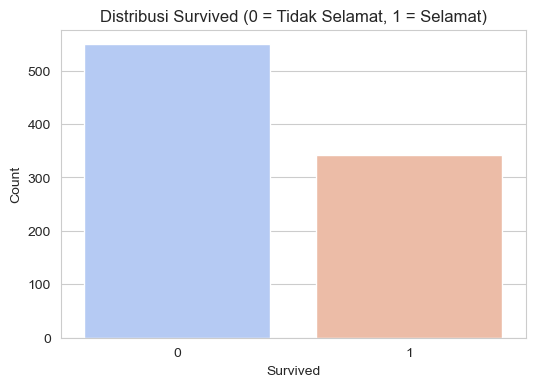

c:\Users\nabil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


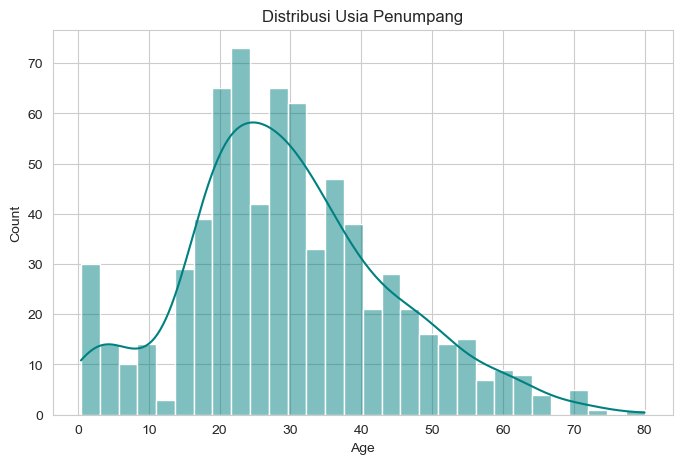

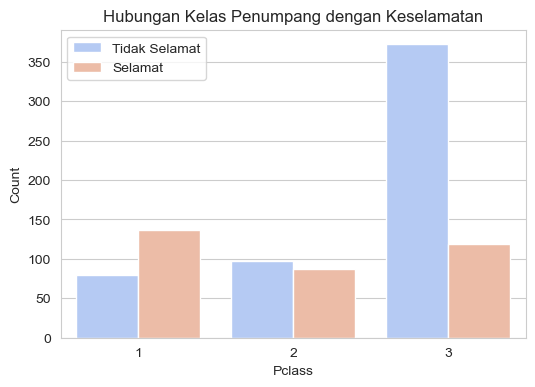

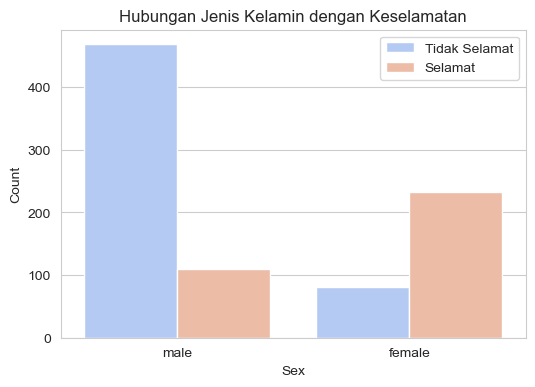

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Distribution of Survived
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Distribusi Survived (0 = Tidak Selamat, 1 = Selamat)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="teal")
plt.title("Distribusi Usia Penumpang")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Survived vs Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Hubungan Kelas Penumpang dengan Keselamatan")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(["Tidak Selamat", "Selamat"])
plt.show()

# Survived vs Sex
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Hubungan Jenis Kelamin dengan Keselamatan")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["Tidak Selamat", "Selamat"])
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# Drop columns that are not useful for modeling
df_cleaned = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [7]:
# Encode categorical variables
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

In [6]:
df_cleaned["Age"].fillna(df_cleaned["Age"].median(), inplace=True)
df_cleaned["Embarked"].fillna(df_cleaned["Embarked"].mode()[0], inplace=True)

C:\Users\nabil\AppData\Local\Temp\ipykernel_10564\520218794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Age"].fillna(df_cleaned["Age"].median(), inplace=True)
C:\Users\nabil\AppData\Local\Temp\ipykernel_10564\520218794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

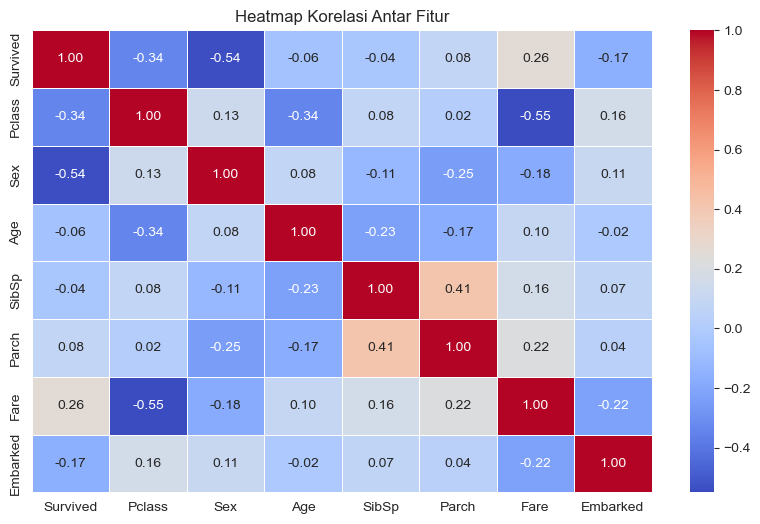

In [20]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [8]:
X = df_cleaned.drop(columns=["Survived"])
y = df_cleaned["Survived"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# Train Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [12]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [13]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:

accuracy, precision, recall, roc_auc, conf_matrix, class_report

(0.7910447761194029,
 0.7238095238095238,
 0.7378640776699029,
 0.8418064136510739,
 array([[136,  29],
        [ 27,  76]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.82      0.83       165\n           1       0.72      0.74      0.73       103\n\n    accuracy                           0.79       268\n   macro avg       0.78      0.78      0.78       268\nweighted avg       0.79      0.79      0.79       268\n')

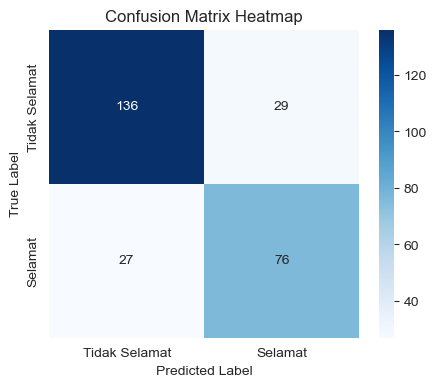

In [17]:
# Visualisasi Confusion Matrix menggunakan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Selamat", "Selamat"], yticklabels=["Tidak Selamat", "Selamat"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()